# Upper Confidence Bound (UCB)

UCB berkenaan dengan problem memilih 1 diantara himpunan item yang kira-kira akan memberikan untung terbanyak. TIap-tiap item memiliki distribusi yang berbeda-beda. dan kita ingin meminimalkan effort untuk menentukan mana yang paling memberikan untuk terbanyak. Jika kita melakukan testing pada tiap item dengan jumlah test yang sama akan memakan waktu dan sumber daya yang besar, namun memang bagus untuk keuntung long-term, ini disebut dengan eksplorasi. Jika kita melakukan meraup keuntungan dari suatu item saja dan item lain tidak terlalu diperhatikan, mungkin tetap akan memberikan keuntungan tetapi mungkin tidak lebih besar dibandingkan meraup dari item lain karena tidak mengetahui apakah distribusi yang lain lebih baik, kegiatan ini disebut eksploitasi.

Jika ingin memaksimalkan eksplotasi dan eksplorasi secara berbarengan, maka membutuhkan algoritma reinforcement learning, salah satunya UCB. Jadi pada UCB kita akan melakukan testing sekaligus melakukan eksploitasi.

Pada algoritman reinforcement, akan dilakukan berkali-kali iterasi, jika kita pilih salah satu item dan outputnya seperti yang diharapkan, maka akan diberi reward (biasanya bernilai 1) dan jika salah dengan yang diharapkan akan diberi punishment (biasanya bernilai 0)

ada 2 ukuran dalam UCB

$R_i (n)$ adalah menentukan seberapa banyak reward yang didapatkan item i sampai dengan (sebelum) iterasi ke-n

$N_i(n)$ adalah ukuran seberapa banyak item i dipilih sampai dengan (sebelum) iterasi ke-n

*Note : Maskud dari sampai dengan iterasi ke-n adalah ukuran $R_i(n)$ dan $N_i(n)$ perhitungan reward dan banyak item i dipilih sebelum iterasi n. contoh: jika sekarang iterasi ke-5, dan kita ingin memilih item untuk eksplotasi, maka perhitungan $R_i$ hanya sampai iterasi ke-4* 

ada 2 parameter dalam UCB

$\overline{r_i} = {R_i (n) \over N_i(n)}$ , adalah parameter eksploitasi, dimana akan menentukan posisi

$Δ_i (n) = \sqrt{{3 \over 2}{log(n) \over N_i (n)}}$, adalah parameter eksplorasi, dimana akan menentukan batas atas batas bawah


dari 2 parameter ini akan menentukan batas-batas $[\overline{r_i}-Δ_i (n),\overline{r_i}+Δ_i (n)]$. Ketika n meningkat (iterasi dijalankan), namun item i tidak dipilih, akan melebarkan sedikit batas atas dan bawah. namun jika item i dipilih, akan mempersembit lumayan besar batas atas dan bawah

dari nilai-nilai yang dibatasi oleh batas-batas ini dipercaya bahwa ada 1 nilai sehingga $\overline{r_i}$ konvergen padanya.

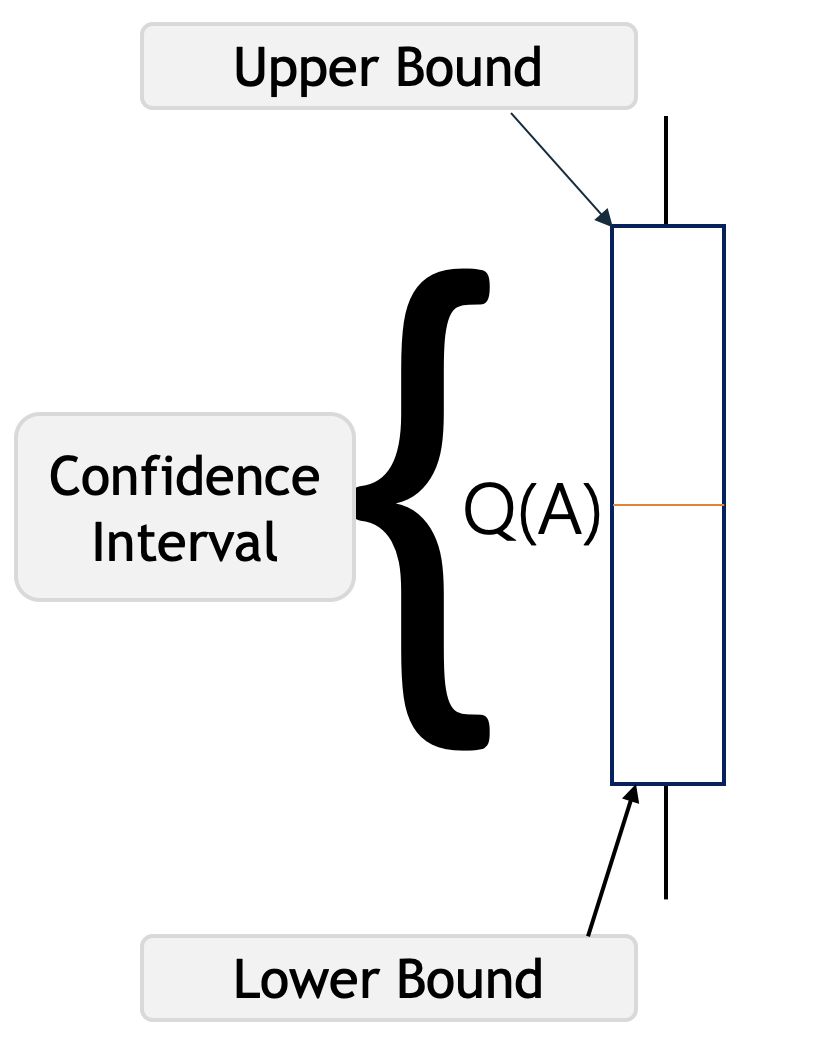

Karena pada upper confidence bound menganut optimism, yang berarti batas atas akan dianggap nilai yang benar sekaligus memberikan keuntungan terbesar. Sehingga untuk memilih item mana yang dijadikan sebagai pilihan untuk melakukan eksplorasi/testing cari dari item-item tersebut yang upper boundnya tertinggi


Contoh pada iterasi ke-n, tiap item memiliki confidence interval sebagai berikut dan ingin memilih item mana untuk dijadikan eksplorasi. mana item pertama lah yang cocok karena memiliki upper bound yang tertinggi dibanding yang lain

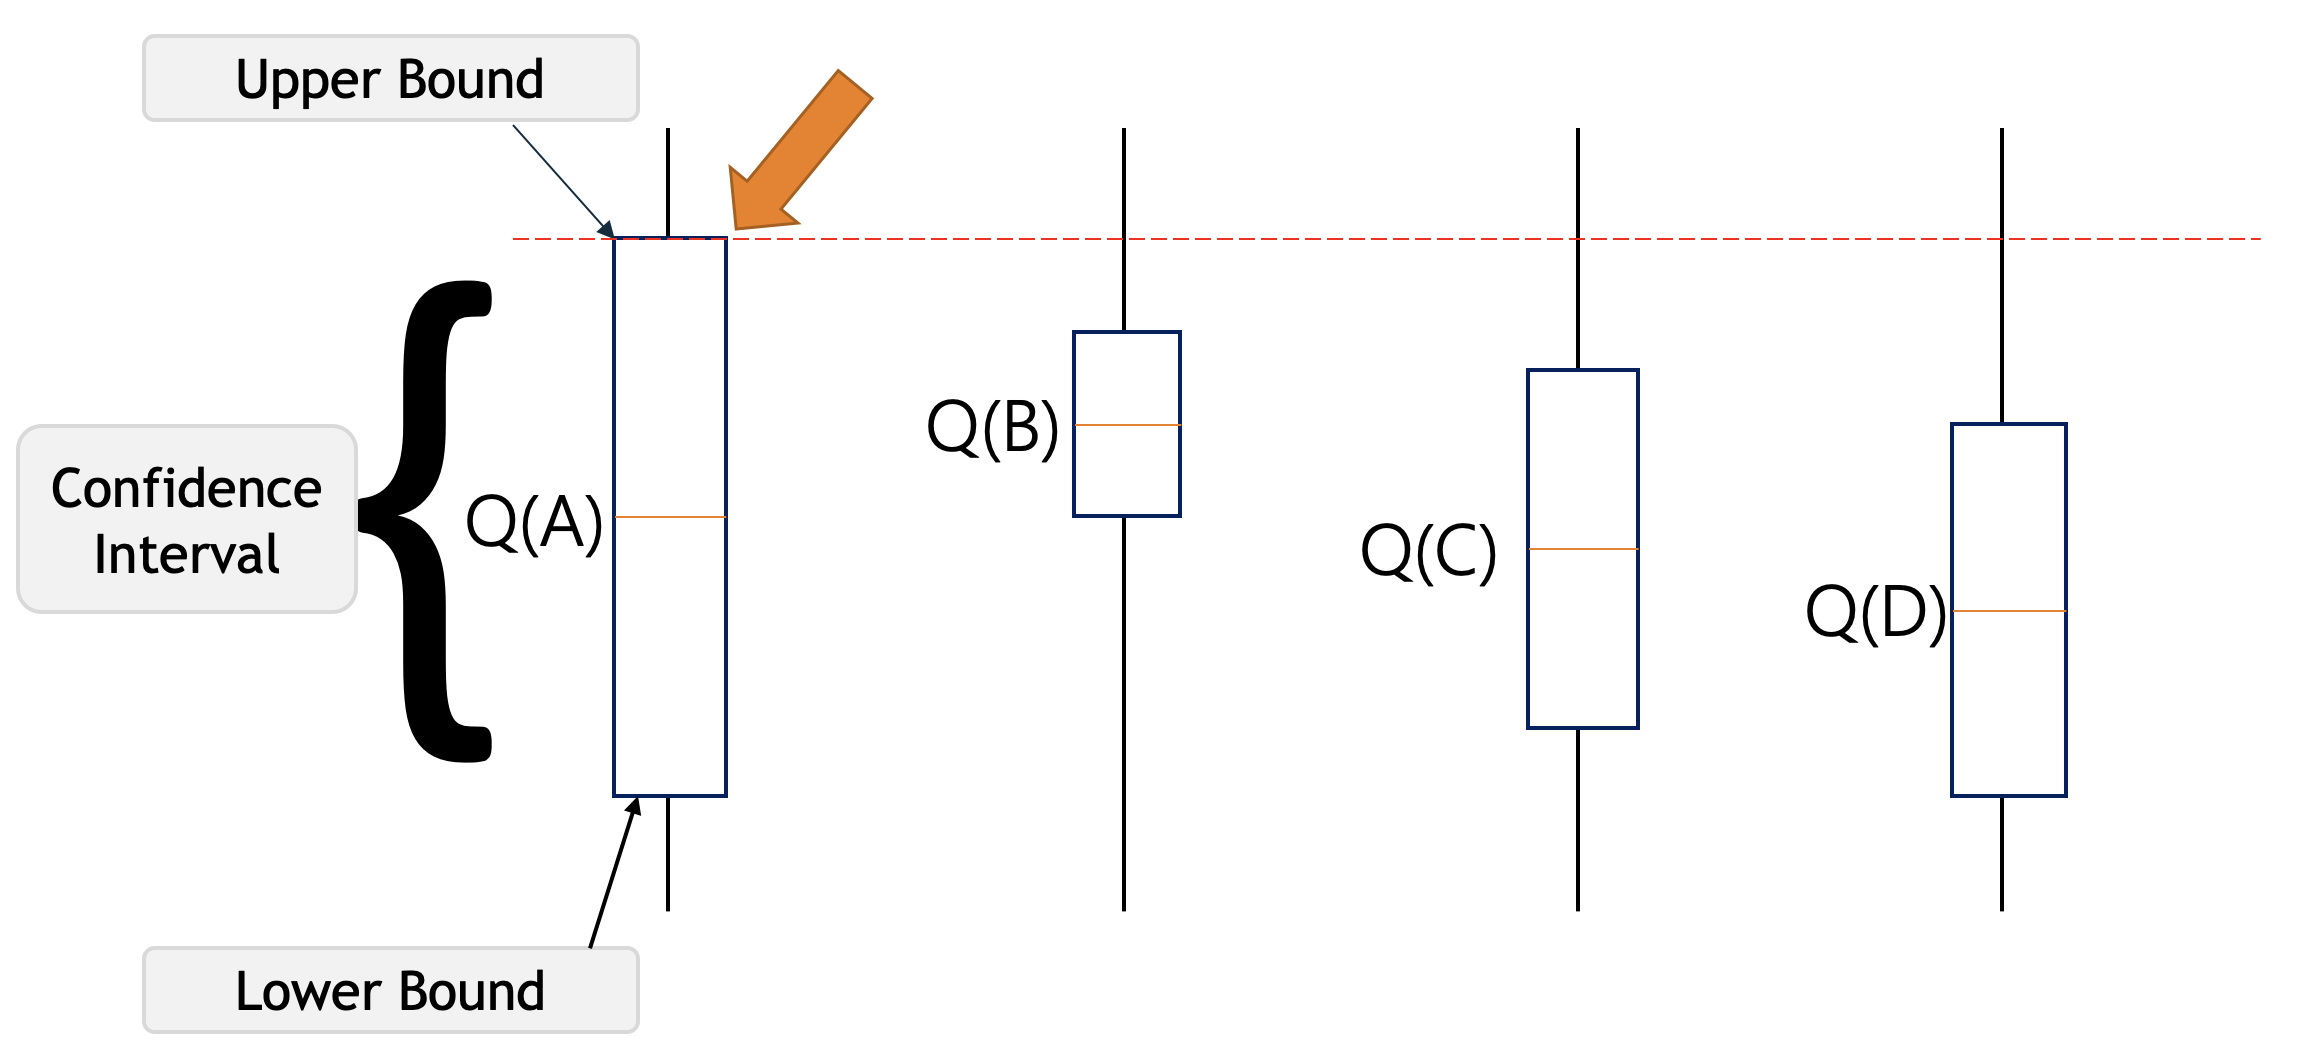

Setelah iterasi n dijalankan mana bentuk-nya menjadi seperti dibawah. Lalu kita ingin melaksanakan iterasi selanjutnya, maka item yang cocok adalah item kedua karena upper boundnya tertinggi

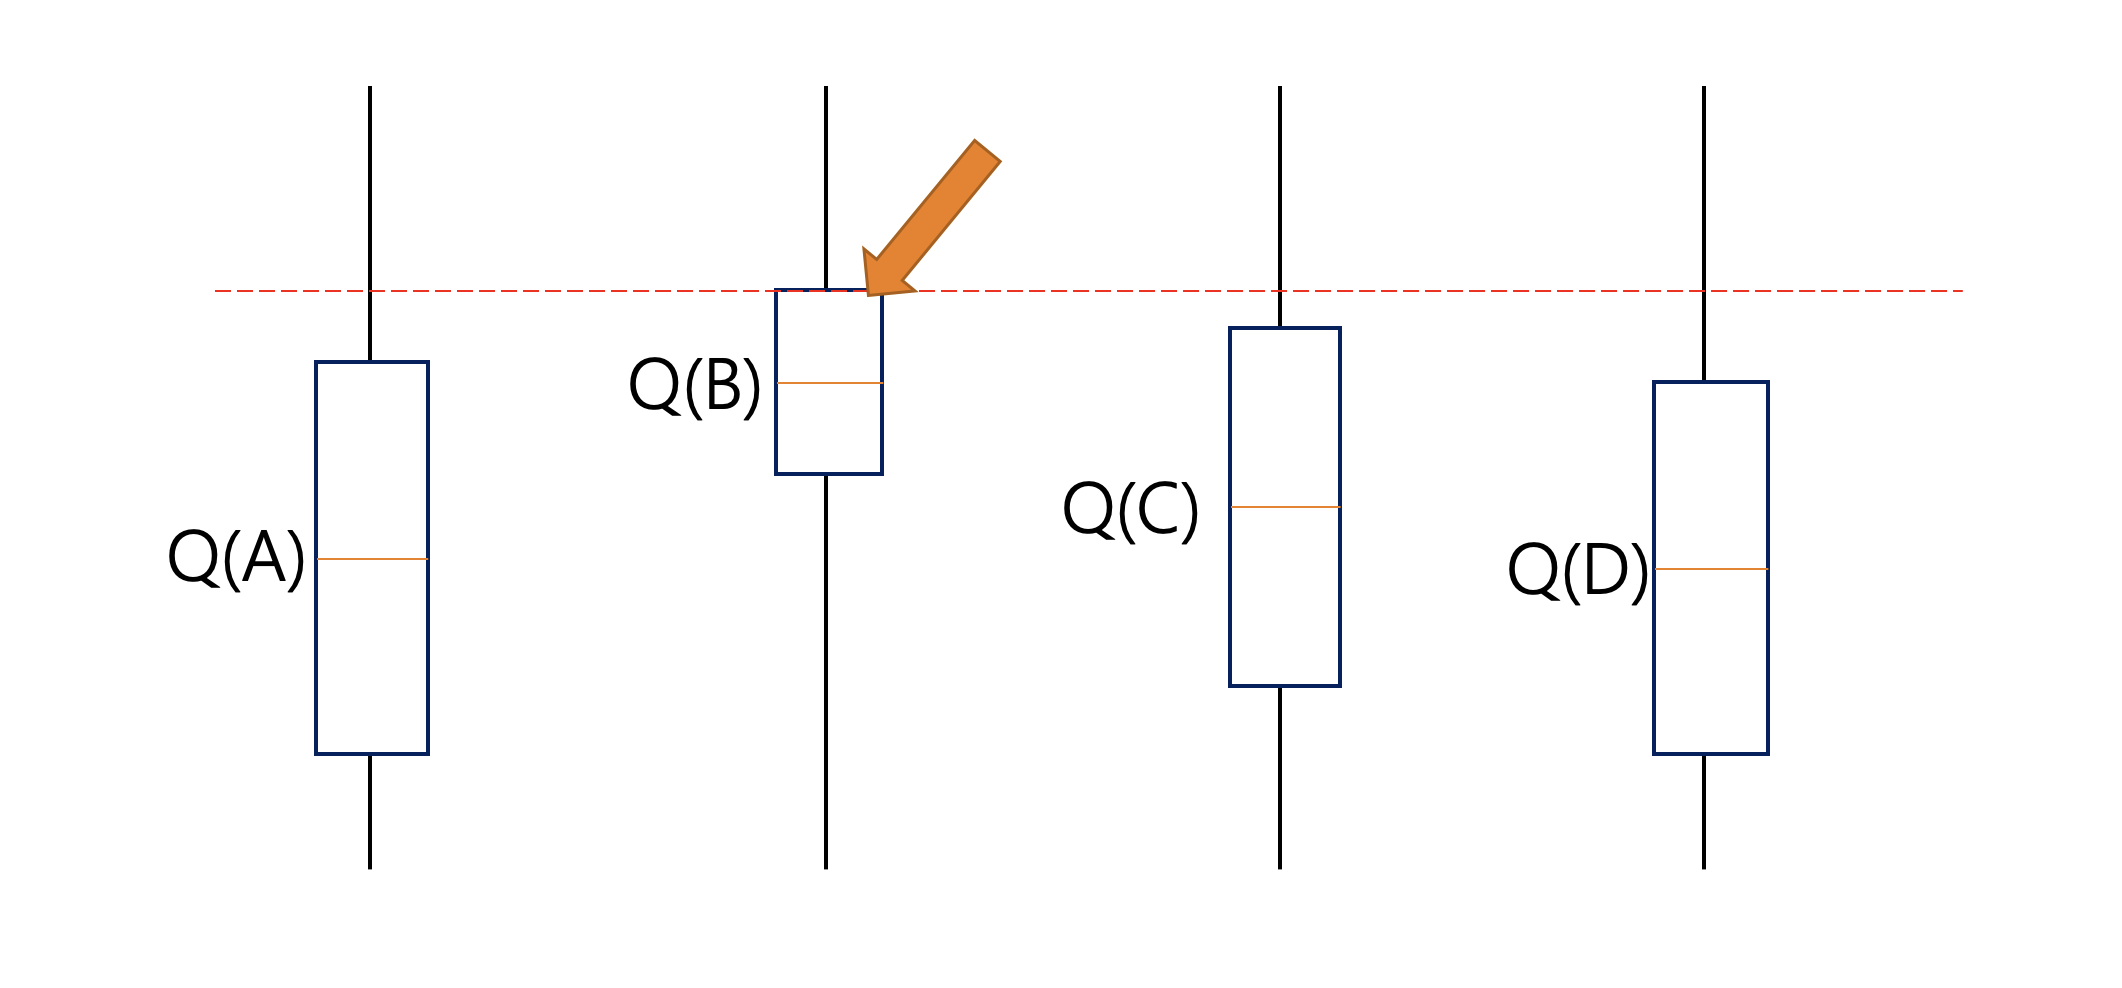

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Data csv diatas adalah data iklan yang diberikan kepada pengguna web
reinforcement learning sangat cocok dilakukan pada testing yang real-time, tetapi karena tidak bisa mensimulasikan iklan secara langsung, maka kita hanya bisa menggunakan csv
cara membaca data tersebut adalah setiap baris (kecuali baris pertama, penjelasannya ada di section dibawah) merepresentasikan pengunjung web dan element ke-i dari baris merepresentasikan tindakan yang diambil pengujung jika disajikan iklan ke-i. Karena kita tidak mengetahui apakah pada saat baris tersebut dipilih iklan tertentu dipilih, kecuali pada saat menjalankan algoritman ini dan bukan saat pembuatan csv, maka kita perlu membuat seluruh element merepresentasikan tindakan yang akan diambil jika disajikan iklan tersebut.

## Implementing UCB

In [ ]:
import random
import math
N = dataset.shape[0]
d = dataset.shape[1]
selected_ad = [0] * d
reward_ad = [0] * d
history_ad_selected = []

#tumbal
for i in range(0,d):
  selected_ad[i]+=1
  reward_ad[i]=dataset.values[0,i]

#N_i tiap item bernilai 1
print(selected_ad)
print(reward_ad)

for i in range(1,N):
  max_upper_bound=0
  #mengecek siapakah item yang memiliki nilai upper bound tertinggi
  for j in range(0,d):
    upper_bound=reward_ad[j]/selected_ad[j]+math.sqrt(3/2*math.log(i+d)/selected_ad[j])
    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad=j

  history_ad_selected.append(ad)
  selected_ad[ad]+=1
  reward_ad[ad]+=dataset.values[i,ad]

print(selected_ad)
print(reward_ad)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[509, 370, 231, 475, 6245, 143, 351, 1129, 351, 205]
[78, 46, 17, 70, 1704, 1, 42, 234, 42, 12]


Pada saat awal-awal, setiap item tidak memiliki $N_i (n)$ dan $R_i(n)$ oleh karena itu $\overline r_i$ dan $Δ_i$ tidak memiliki nilai. Oleh karena itu pada baris pertama data csv dijadikan tumbal untuk setidaknya memberikan nilai $N_i (n)$, sehingga kedua parameter setidaknya memiliki nilai. Tiap iklan pada baris pertama seakan-akan diberikan kepada user dan hasil apakah user meng-click atau tidak direpresentasikan oleh element pada beris tersebut

konsekuensi dari tindakan ini adalah karena pada $Δ_i$ melibatkan log(n), maka n harus sama dengan baris+jumlah tumbal

## Visualising the results

(array([ 508.,  369.,  230.,  474., 6244.,  142.,  350., 1128.,  350.,
         204.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

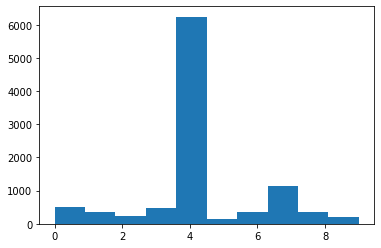

In [ ]:
plt.hist(history_ad_selected)